<a href="https://colab.research.google.com/github/uzayri001/InsuranceCalculator/blob/main/InsuranceCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [14]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-04-02 17:07:33--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.03s   

2025-04-02 17:07:34 (1.46 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [15]:
# use one-hot encoding for categorical variables
dataset = pd.get_dummies(dataset, drop_first=True).astype(int)
print(dataset.head())

   age  bmi  children  expenses  sex_male  smoker_yes  region_northwest  \
0   19   27         0     16884         0           1                 0   
1   18   33         1      1725         1           0                 0   
2   28   33         3      4449         1           0                 0   
3   33   22         0     21984         1           0                 1   
4   32   28         0      3866         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [16]:
# Split the data into input features and target variable
X = dataset.drop(columns=['expenses'])
y = dataset['expenses']

In [17]:
# 80/20 train,test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)  # Output Layer for Regression
])

In [49]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [50]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 315976032.0000 - mae: 13417.3818 - mse: 315976032.0000 - val_loss: 310334240.0000 - val_mae: 12654.3076 - val_mse: 310334240.0000
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 322722560.0000 - mae: 13425.0332 - mse: 322722560.0000 - val_loss: 309898368.0000 - val_mae: 12638.8018 - val_mse: 309898368.0000
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 316588992.0000 - mae: 13426.9385 - mse: 316588992.0000 - val_loss: 305089280.0000 - val_mae: 12478.7383 - val_mse: 305089280.0000
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 317990656.0000 - mae: 13310.2832 - mse: 317990656.0000 - val_loss: 278651872.0000 - val_mae: 11625.2080 - val_mse: 278651872.0000
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 263253264.0000 - mae: 11549.4043 - mse: 263253264.0000 - val_loss: 197912160.0000 - val_mae: 8890.7822 - val_mse: 197912160.0000
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - l

9/9 - 0s - 7ms/step - loss: 22668864.0000 - mae: 3029.4299 - mse: 22668864.0000
Testing set Mean Abs Error: 3029.43 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


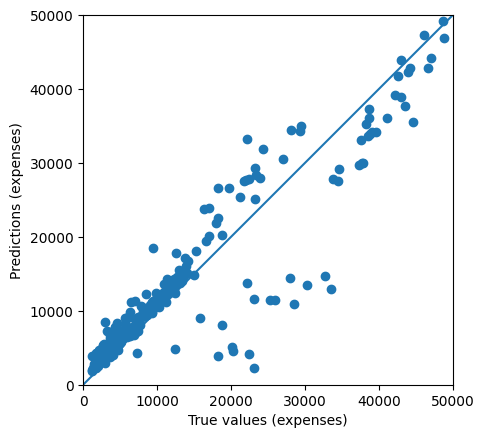

In [51]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)